# Loan Risk Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#reading our csv files
df = pd.read_csv("data/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
# columns of df 
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [3]:
#types of columns
df.shape

(32581, 12)

In [4]:
#checking for null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
#dropping null values
df.dropna(inplace=True)

In [6]:
df.shape

(28638, 12)

In [7]:
#checking for duplicates
df.duplicated().sum()

137

In [8]:
#dropping duplicates
df.drop_duplicates(inplace=True)
df.shape

(28501, 12)

<AxesSubplot:>

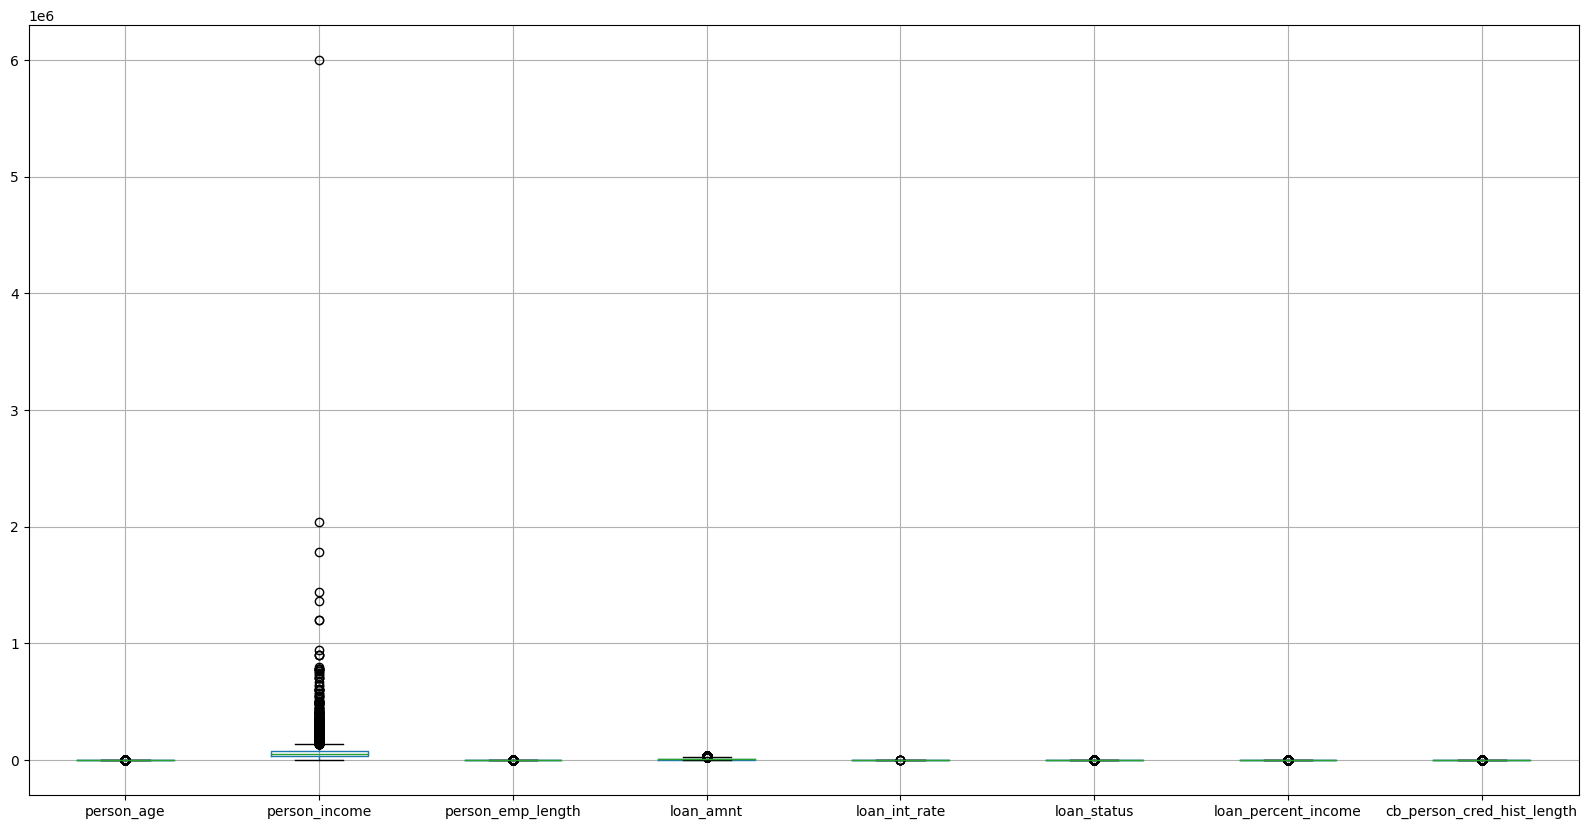

In [9]:
#checking for outliers
df.boxplot(figsize=(20,10))

In [10]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final
df_outlier_removed=remove_outlier_IQR(df.person_income)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final

<AxesSubplot:>

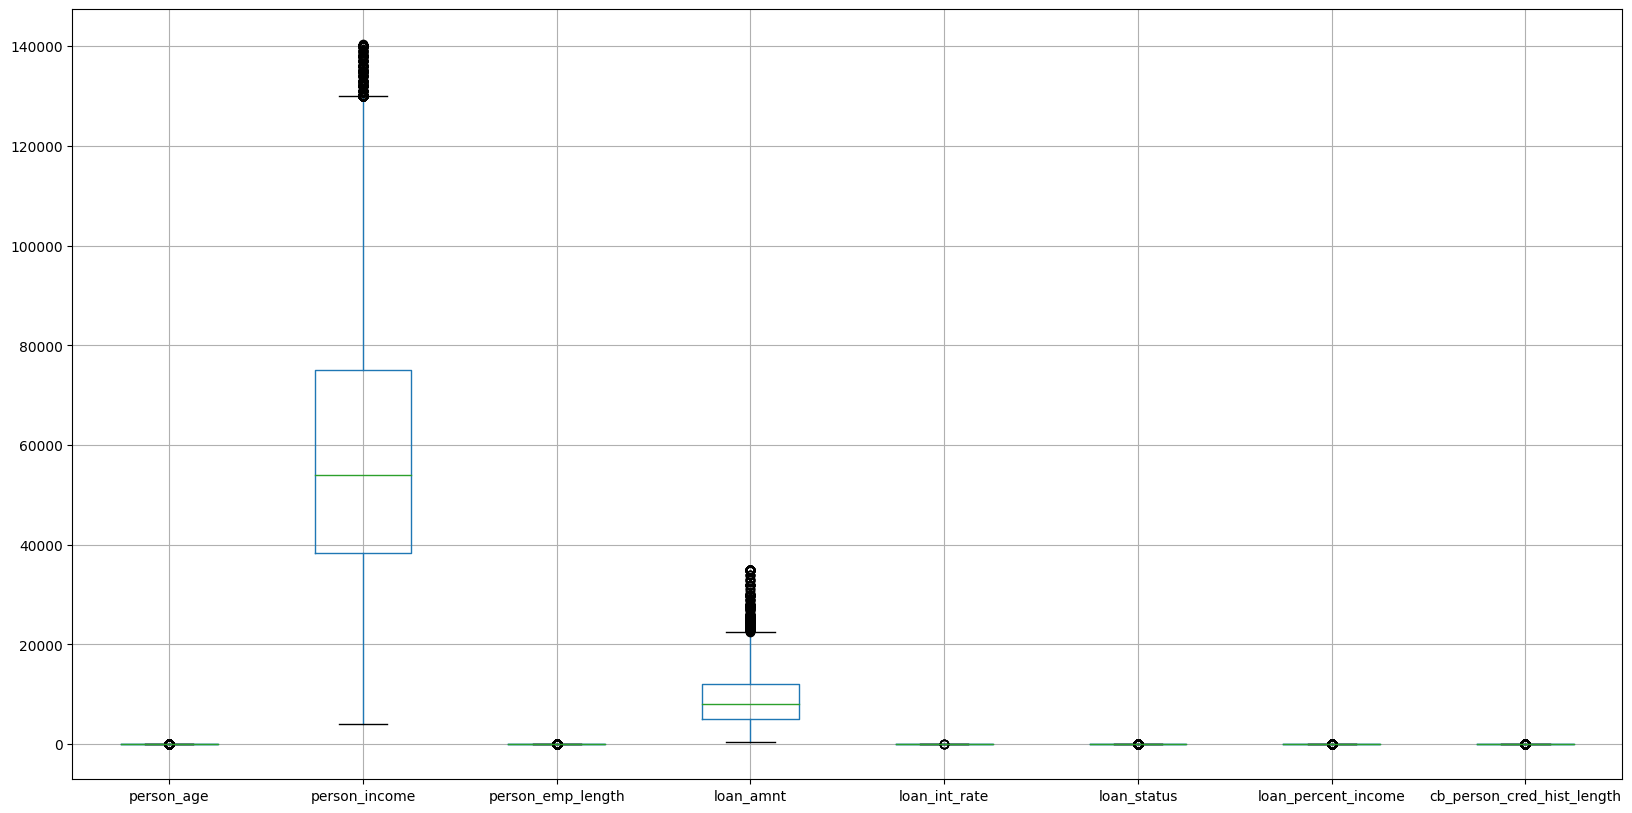

In [11]:
#checking for outliers
df.boxplot(figsize=(20,10))

In [12]:
df_outlier_removed=remove_outlier_IQR(df.person_income)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final

<AxesSubplot:>

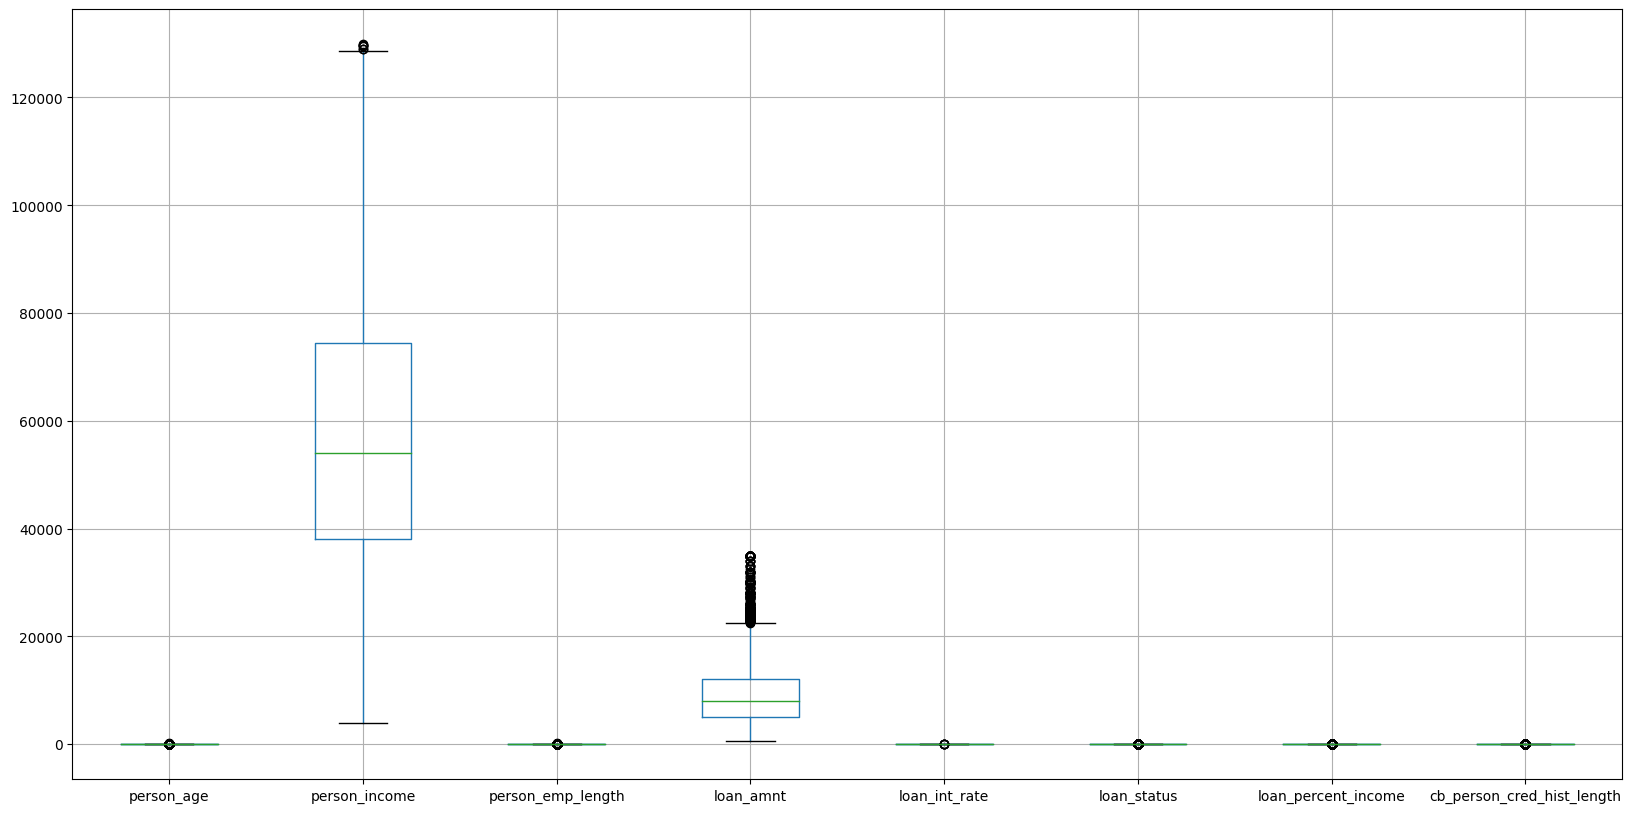

In [13]:
#checking for outliers
df.boxplot(figsize=(20,10))

In [14]:
# removing outliers for loan_amnt
df_outlier_removed=remove_outlier_IQR(df.loan_amnt)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)
for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final

<AxesSubplot:>

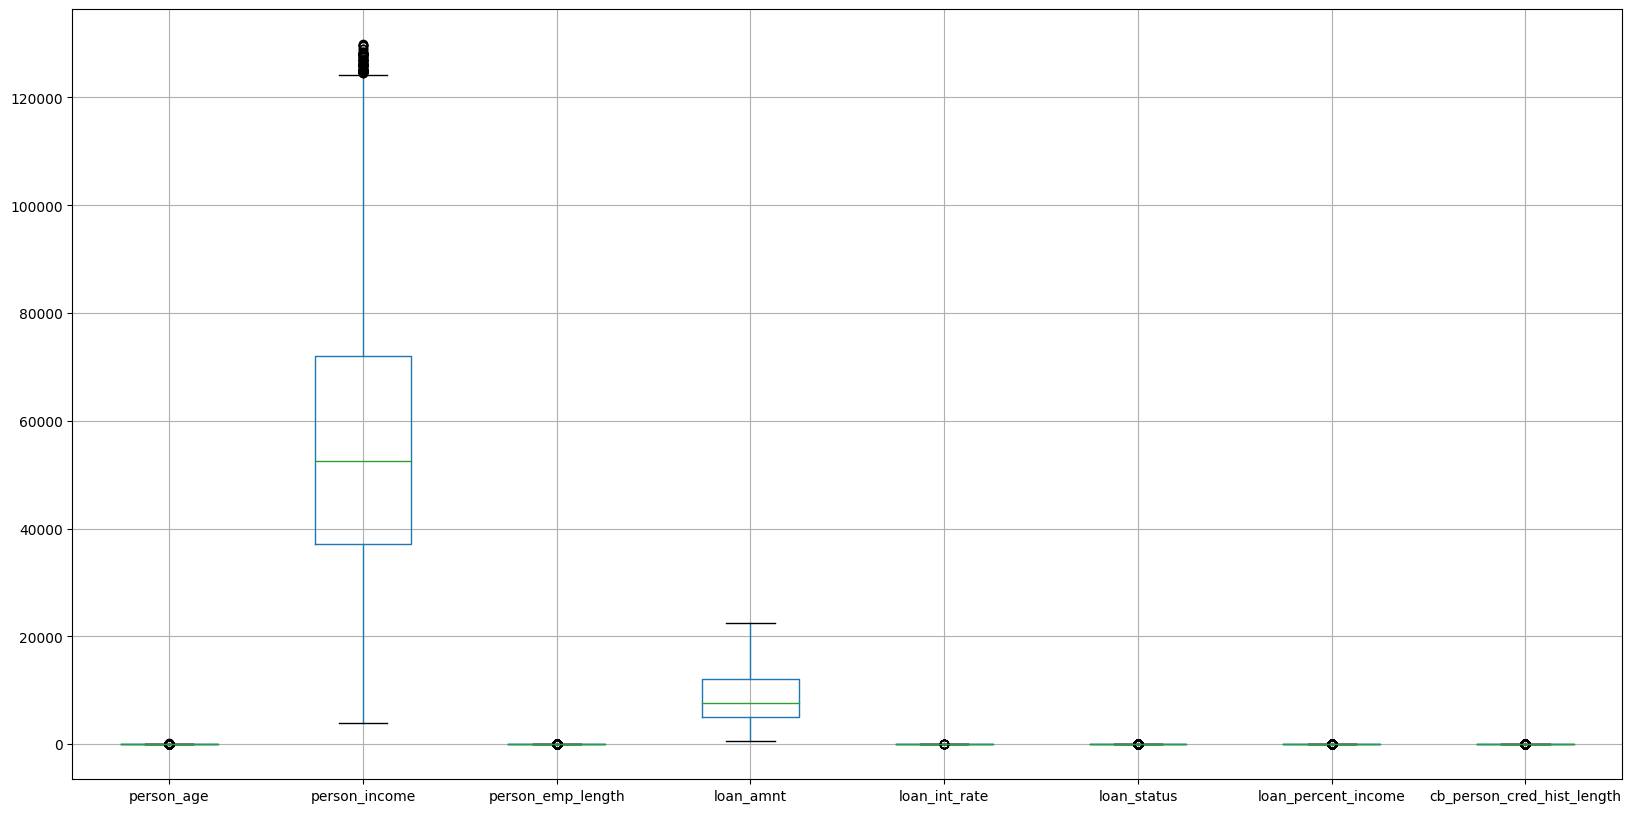

In [15]:
#checking for outliers
df.boxplot(figsize=(20,10))

In [16]:
df.shape

(25588, 12)

In [17]:
df_outlier_removed=remove_outlier_IQR(df.person_income)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final

<AxesSubplot:>

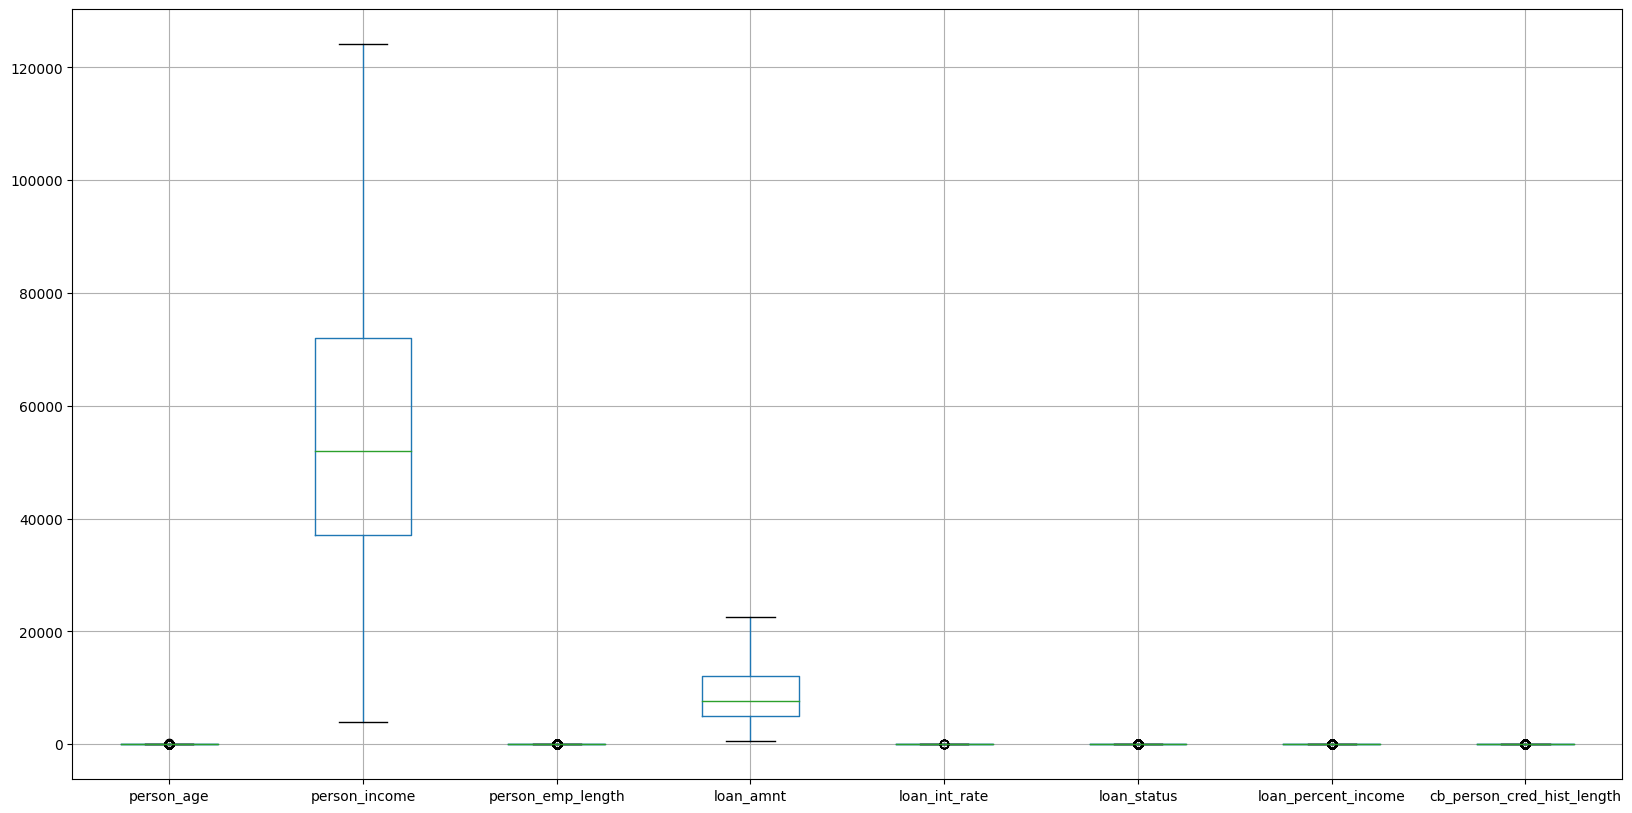

In [18]:
#checking for outliers
df.boxplot(figsize=(20,10))

In [19]:
df.shape

(25400, 12)

In [20]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [21]:
#value counts for person_home_ownership
df.person_home_ownership.value_counts()

RENT        13589
MORTGAGE     9775
OWN          1957
OTHER          79
Name: person_home_ownership, dtype: int64

In [22]:
#encoding manually for person_home_ownership
df.person_home_ownership.replace({'RENT':0,'MORTGAGE':1,'OWN':2,'OTHER':3},inplace=True)

In [23]:
df.person_home_ownership.value_counts()

0    13589
1     9775
2     1957
3       79
Name: person_home_ownership, dtype: int64

In [24]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [25]:
#encoding manually for loan_intent, loan_grade, loan_sub_grade, cb_person_default_on_file
df.loan_intent.replace({'MEDICAL':0,'EDUCATION':1,'VENTURE':2,'HOMEIMPROVEMENT':3,'DEBTCONSOLIDATION':4,'PERSONAL':5,'HOUSE':6,'AUTO':7,'OTHER':8,'WEDDING':9,'GREEN':10},inplace=True)
df.loan_grade.replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6},inplace=True)
df.cb_person_default_on_file.replace({'Y':0,'N':1},inplace=True)

In [26]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
dtype: object

In [27]:
#oversampling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_sm, y_sm = smote.fit_resample(X, y)
X_sm = pd.DataFrame(X_sm, columns=X.columns)
y_sm = pd.DataFrame(y_sm, columns=['loan_status'])
df = pd.concat([X_sm, y_sm], axis=1)

In [28]:
y_sm.value_counts()

loan_status
0              19894
1              19894
dtype: int64

<AxesSubplot:>

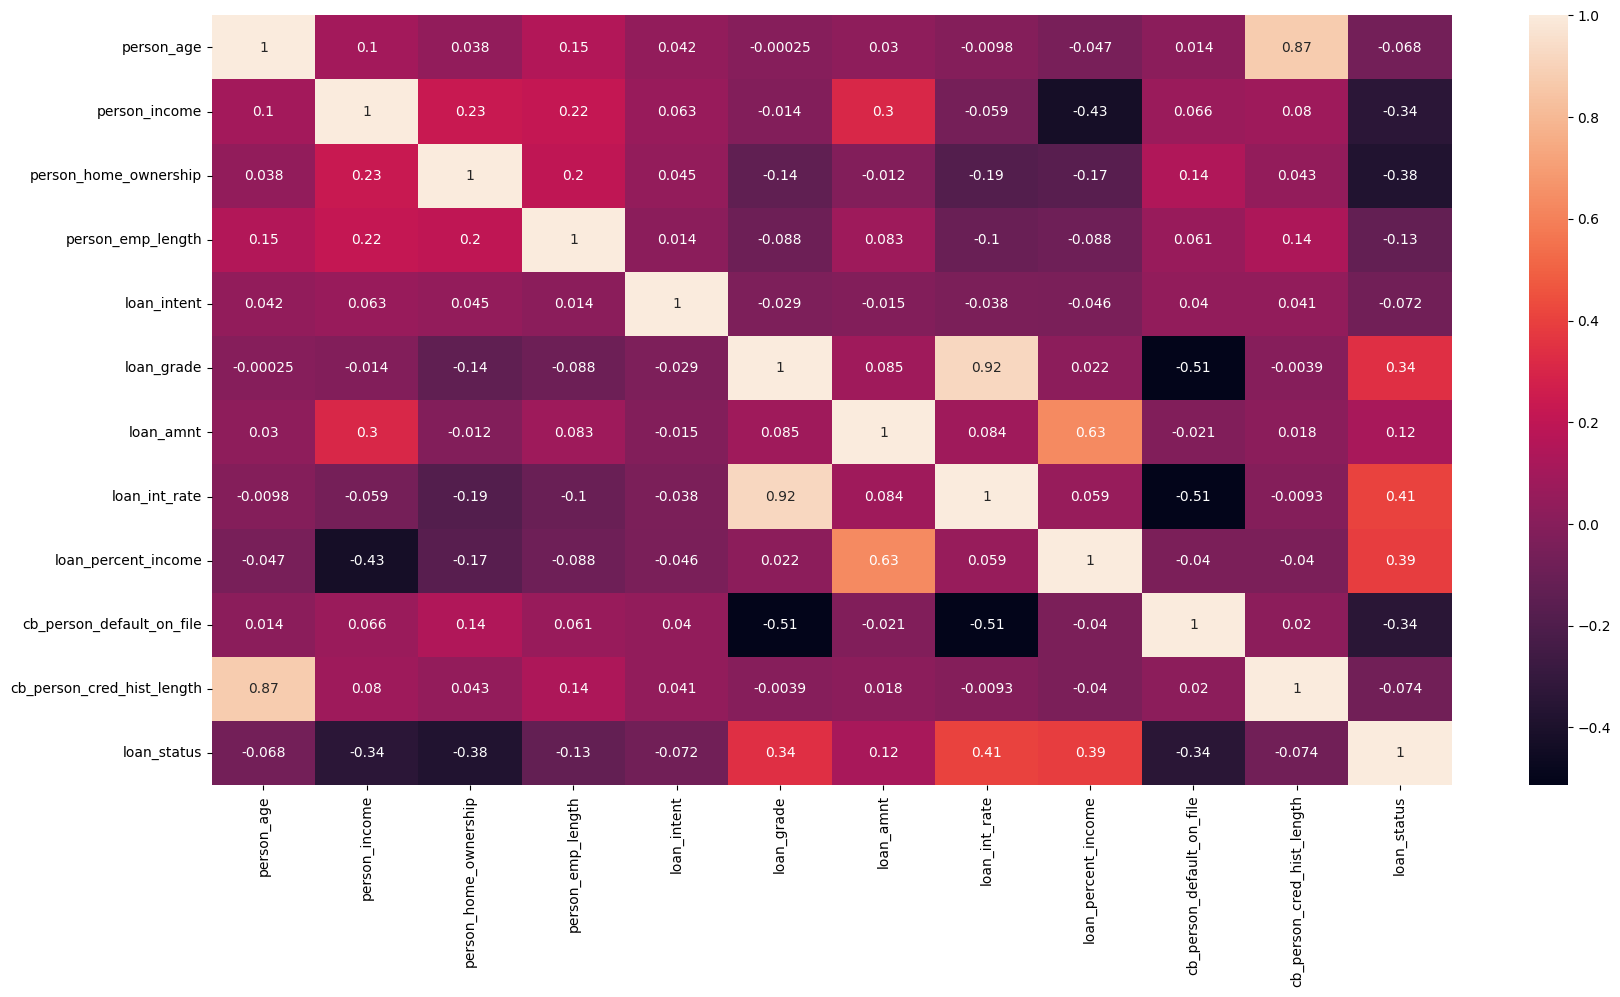

In [29]:
#correlation matrix
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True) 

In [30]:
#drop loan_grade from X_sm
X_sm.drop('loan_grade', axis=1, inplace=True)

In [31]:
#drop cb_person_cred_hist_length from X_sm
X_sm.drop('cb_person_cred_hist_length', axis=1, inplace=True)

In [32]:
X_sm.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file
0,21,9600,2,5.0,1,1000,11.14,0.10,1
1,25,9600,1,1.0,0,5500,12.87,0.57,1
2,21,9900,2,2.0,2,2500,7.14,0.25,1
3,21,10000,2,6.0,2,1600,14.74,0.16,1
4,21,10000,2,2.0,3,4500,8.63,0.45,1


C:\Users\MSI PC\AppData\Local\Temp\ipykernel_5056\1544128625.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_sm,y_sm)


[0.06266547 0.16255517 0.10917611 0.0760858  0.0602226  0.09131376
 0.16247997 0.18097065 0.09453048]


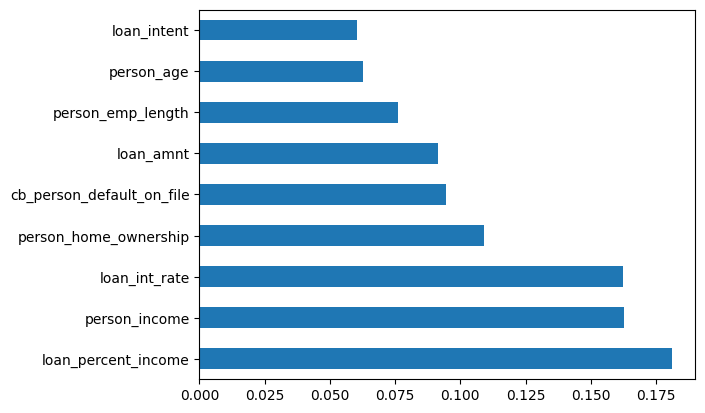

In [33]:
#feature importance to predict loan_status
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_sm,y_sm)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_sm.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [34]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [35]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
#normalizing data
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#XGboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8804976124654436

<AxesSubplot:>

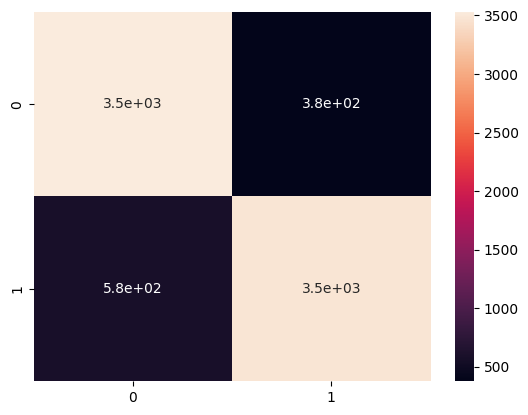

In [38]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [39]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

c:\Users\MSI PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8025885900980145

<AxesSubplot:>

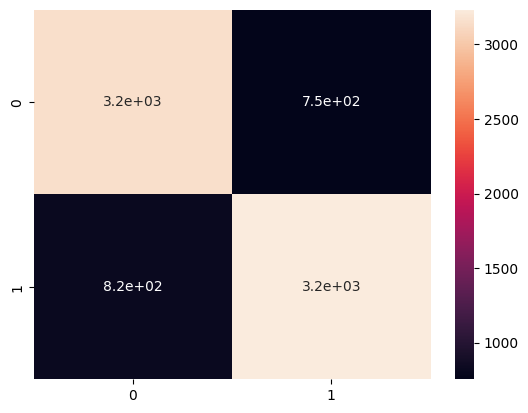

In [40]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [41]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_5056\1745015691.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.884393063583815

In [42]:
#grid search on xgboost 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
}

In [43]:
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)


In [44]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 315 candidates, totalling 945 fits


{'learning_rate': 0.4, 'max_depth': 9, 'n_estimators': 500}

In [46]:
#xgb with best params
xgb = XGBClassifier(learning_rate=0.4, max_depth=9, n_estimators=500)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8988439306358381

In [47]:
#grid search on random forest 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [48]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)


In [49]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


c:\Users\MSI PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [50]:
#random forest with best params
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_5056\2699306077.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.8590098014576527